In [1]:
import os, yaml, sys
import numpy as np
import matplotlib.pyplot as plt
import pickle
import cv2
from scipy.stats import zscore
from IPython.display import clear_output
%matplotlib inline

ENV = os.getenv("MY_ENV", "dev")
with open("../../config.yaml", "r") as f:
    config = yaml.safe_load(f)
paths = config[ENV]["paths"]
sys.path.append(paths["src_path"])
from general_utils.utils import autocorr_mat, get_lagplot
from data_preprocessing.preprocessing import min_max_normalization
from image_processing.utils import read_video

In [7]:
# parameters to tweak
monkey_name = "red"
day = "0825"
npx = False
imec_n = 0
resolution_Hz = 100

# paths setting 
data_path = f"{paths['livingstone_lab']}/tiziano/data"
if npx:
    neural_path = f"{data_path}/neural_{monkey_name}_25{day}_imec{imec_n}_{resolution_Hz}Hz.pkl"
    gaze_path = f"{data_path}/gaze_{monkey_name}_25{day}_imec{imec_n}_{resolution_Hz}Hz.pkl"
else:
    neural_path = f"{data_path}/neural_{monkey_name}_25{day}_plx_{resolution_Hz}Hz.pkl"
    gaze_path = f"{data_path}/gaze_{monkey_name}_25{day}_plx_{resolution_Hz}Hz.pkl"
# end if npx:

In [8]:
# loading of the data
with open(neural_path, "rb") as f:
    data = pickle.load(f)
with open(gaze_path, "rb") as f:
    data_gaze = pickle.load(f)

In [9]:
stimuli_names = list(data.keys())
print(len(stimuli_names), stimuli_names)

19 ['IMG_4672.mp4', 'IMG_4663.mp4', 'IMG_4669.mp4', 'IMG_4662.mp4', 'IMG_4667.mp4', 'IMG_4673.mp4', 'IMG_4656.mp4', 'IMG_4668.mp4', 'IMG_4655.mp4', 'IMG_4666.mp4', 'IMG_4671.mp4', 'IMG_4658.mp4', 'IMG_4664.mp4', 'IMG_4670.mp4', 'IMG_4665.mp4', 'IMG_4657.mp4', 'IMG_4661.mp4', 'IMG_4659.mp4', 'IMG_4660.mp4']


In [10]:
data_norm = min_max_normalization(data)

Text(0.5, 0, 'timepoints')

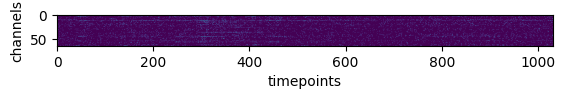

In [11]:
plt.imshow(np.mean(data_norm[stimuli_names[0]], axis=2), aspect=1, cmap='viridis')
plt.ylabel("channels"); plt.xlabel("timepoints")

Text(0.5, 0, 'timepoints')

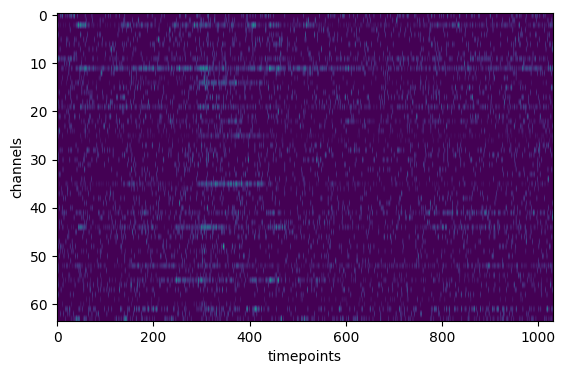

In [12]:
plt.imshow(np.mean(data_norm[stimuli_names[0]], axis=2), aspect=10, cmap='viridis')
plt.ylabel("channels"); plt.xlabel("timepoints")

Text(0.5, 0, 'timepoints')

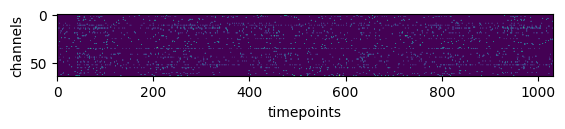

In [13]:
curr_data = data[stimuli_names[8]][:,:,0]
data_normalized_per_row = (curr_data - curr_data.min(axis=1, keepdims=True)) / (curr_data.max(axis=1, keepdims=True) - curr_data.min(axis=1, keepdims=True))
plt.imshow(data_normalized_per_row, aspect=2, cmap='viridis')
plt.ylabel("channels"); plt.xlabel("timepoints")

Text(0.5, 0, 'timepoints')

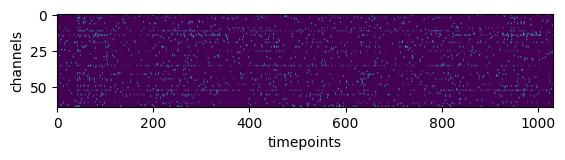

In [14]:
# plt.imshow(zscore(data[stimuli_names[0]][:,:,0], axis=1), aspect=3, cmap='viridis')
plt.imshow(data_normalized_per_row, aspect=3, cmap='viridis')
plt.ylabel("channels"); plt.xlabel("timepoints")

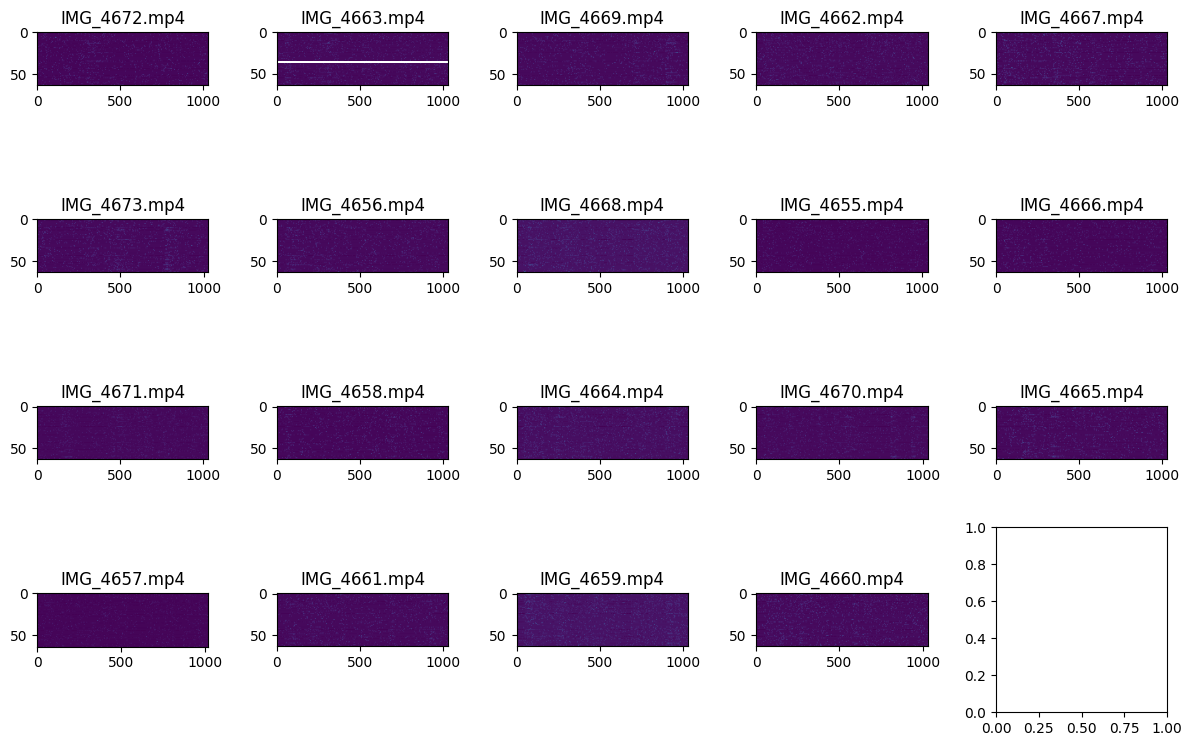

In [15]:
# plots the average data
counter = 0
n_plots = len(stimuli_names)
n_cols = int(np.ceil(np.sqrt(n_plots)))
n_rows = int(np.ceil(n_plots / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes_flat = axes.ravel()
for i, s in enumerate(stimuli_names):
    if data[s].shape[0] != 0:
        axes_flat[i].imshow(zscore(data[s][:,:,0], axis=1), aspect=5)
        axes_flat[i].set_title(s)
plt.tight_layout()  # automatically adjusts spacing
plt.show()

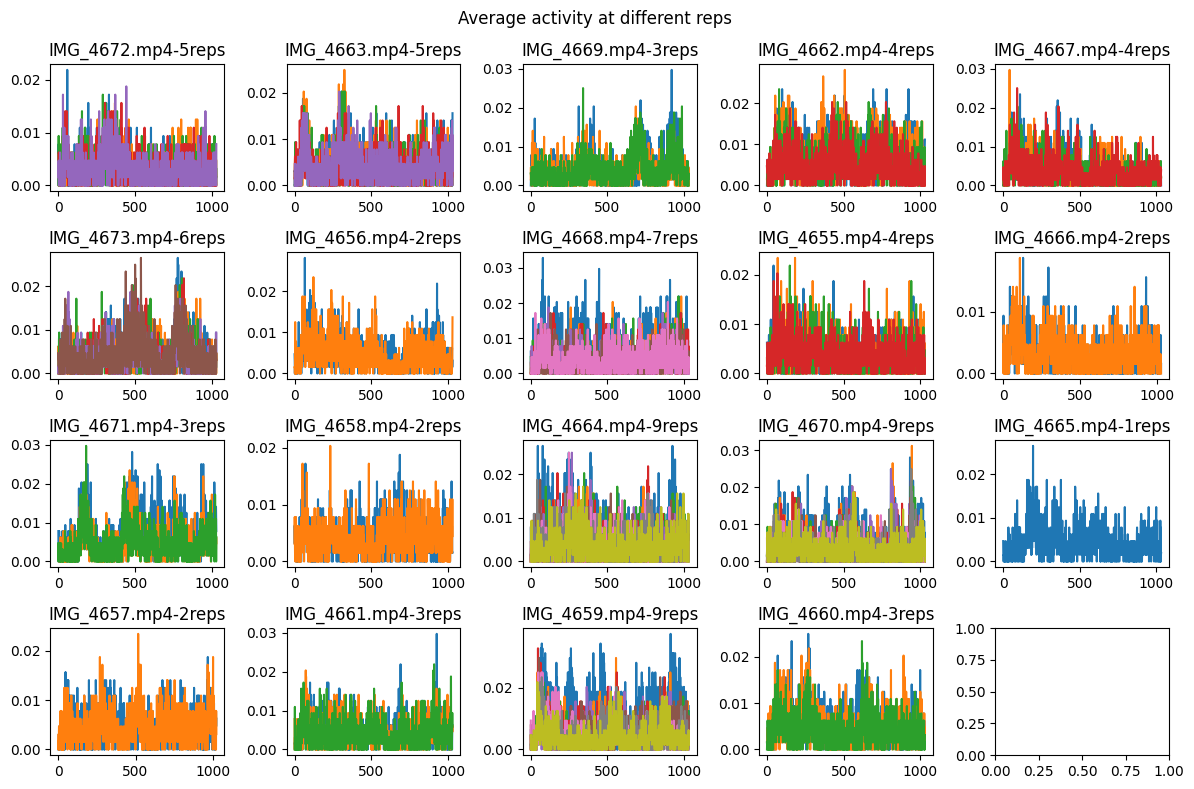

In [16]:
# plots the average data
counter = 0
n_plots = len(stimuli_names)
n_cols = int(np.ceil(np.sqrt(n_plots)))
n_rows = int(np.ceil(n_plots / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes_flat = axes.ravel()
for i, s in enumerate(stimuli_names):
    if data[s].shape != (0,):
        n_repetitions = data[s].shape[2]
        avg_units = np.mean(data[s], axis=0)
        axes_flat[i].plot(avg_units)
        axes_flat[i].set_title(f"{s}-{n_repetitions}reps")
plt.suptitle("Average activity at different reps")
plt.tight_layout()  # automatically adjusts spacing
plt.show()


(1031, 5)
(1032, 5)
(1031, 3)
(1032, 4)
(1032, 4)
(1030, 6)
(1032, 2)
(1032, 7)
(1031, 4)
(1031, 2)
(1031, 3)
(1032, 2)
(1031, 9)
(1030, 9)
(1032, 1)
(1024, 2)
(1032, 3)
(1031, 9)
(1030, 3)


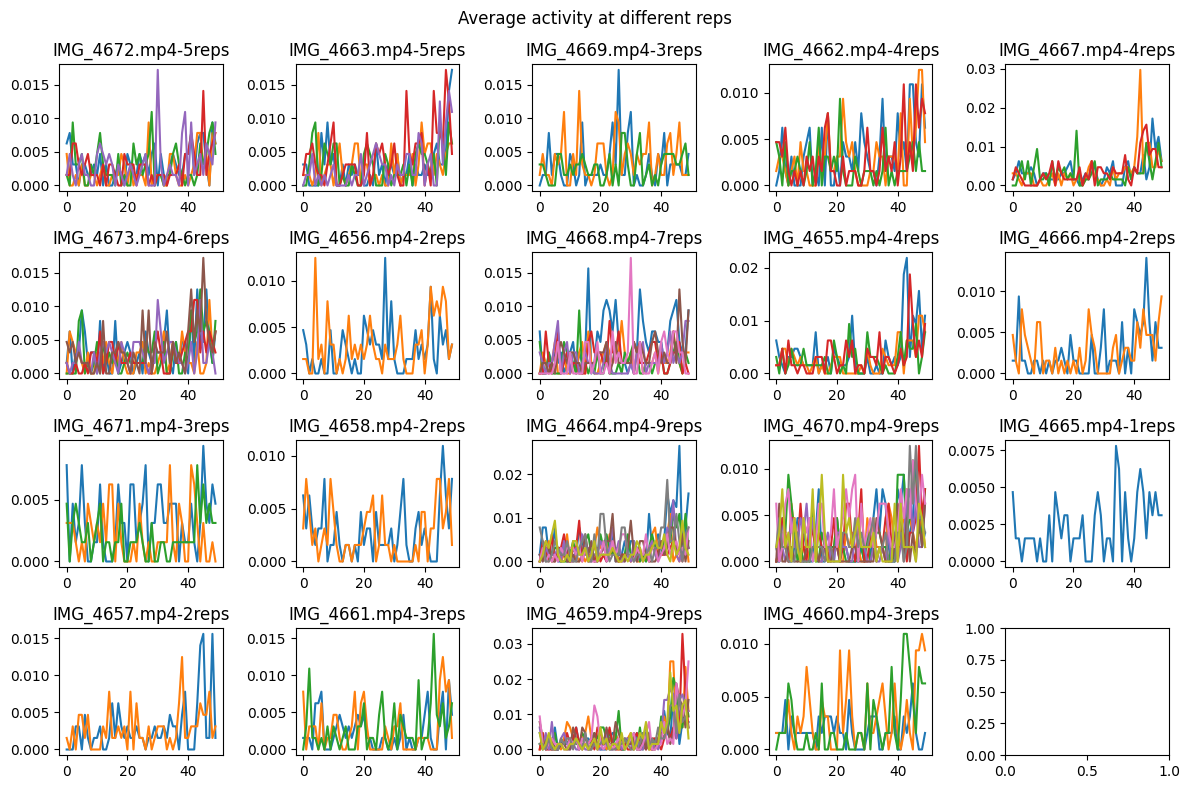

In [17]:
# plots the average data
counter = 0
n_plots = len(stimuli_names)
n_cols = int(np.ceil(np.sqrt(n_plots)))
n_rows = int(np.ceil(n_plots / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes_flat = axes.ravel()
for i, s in enumerate(stimuli_names):
    if data[s].shape != (0,):
        n_repetitions = data[s].shape[2]
        avg_units = np.mean(data[s], axis=0)
        print(avg_units.shape)
        axes_flat[i].plot(avg_units[:50, :])
        axes_flat[i].set_title(f"{s}-{n_repetitions}reps")
plt.suptitle("Average activity at different reps")
plt.tight_layout()  # automatically adjusts spacing
plt.show()


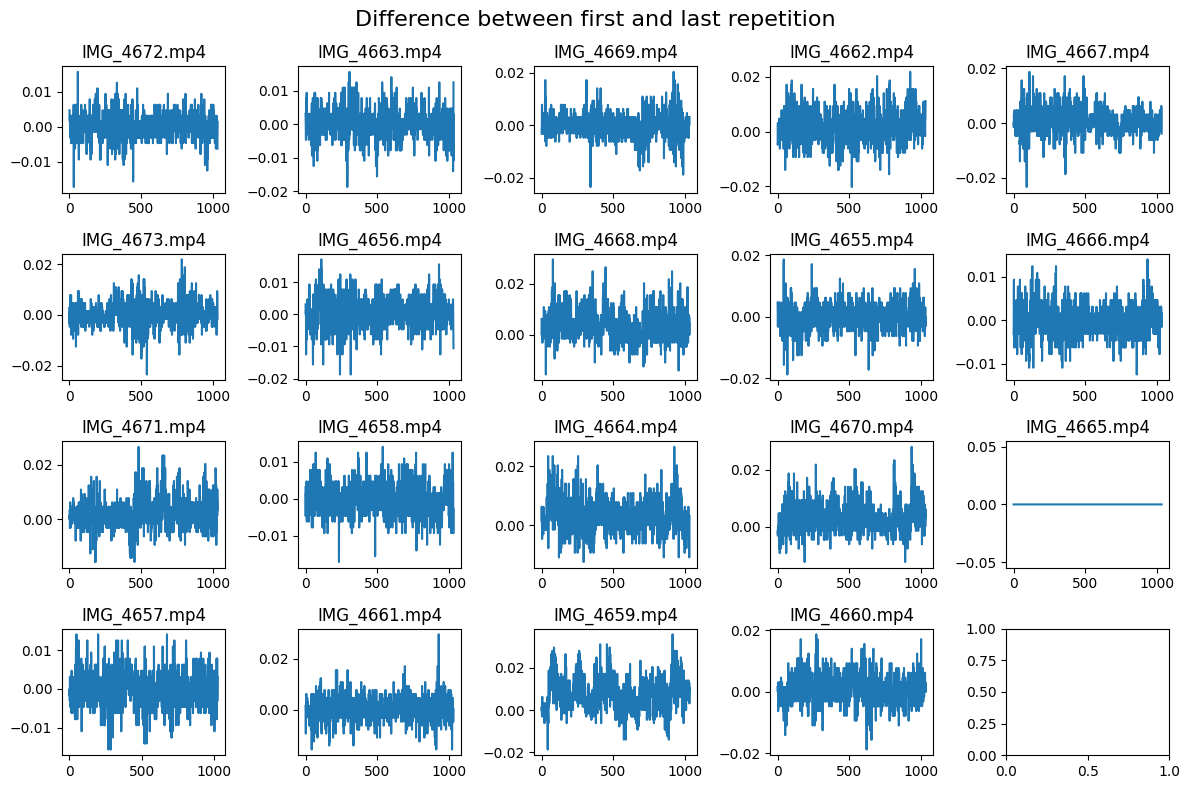

In [18]:
counter = 0
n_plots = len(stimuli_names)
n_cols = int(np.ceil(np.sqrt(n_plots)))
n_rows = int(np.ceil(n_plots / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes_flat = axes.ravel()
for i,s in enumerate(stimuli_names):
    if data[s].shape != (0,):
        n_repetitions = data[s].shape[2]
        avg_units = np.mean(data[s], axis=0)
        first_vs_last = avg_units[:,0] - avg_units[:,-1]
        axes_flat[i].plot(first_vs_last)
        axes_flat[i].set_title(s)
        counter += 1
fig.suptitle("Difference between first and last repetition", fontsize=16)
plt.tight_layout()  # automatically adjusts spacing
plt.show()

In [19]:
print("first vs last repetition correlation of the average time series")
for s in stimuli_names:
    if data[s].shape != (0,):
        n_repetitions = data[s].shape[2]
        avg_units = np.mean(data[s], axis=0)
        corrfirst_vs_last = np.corrcoef(avg_units[:,0], avg_units[:,-1])
        print(s, np.round(corrfirst_vs_last[0,1], 2), f"with {n_repetitions} reps")

first vs last repetition correlation of the average time series
IMG_4672.mp4 0.19 with 5 reps
IMG_4663.mp4 0.18 with 5 reps
IMG_4669.mp4 0.25 with 3 reps
IMG_4662.mp4 0.05 with 4 reps
IMG_4667.mp4 0.16 with 4 reps
IMG_4673.mp4 0.32 with 6 reps
IMG_4656.mp4 0.24 with 2 reps
IMG_4668.mp4 0.09 with 7 reps
IMG_4655.mp4 0.06 with 4 reps
IMG_4666.mp4 0.17 with 2 reps
IMG_4671.mp4 0.27 with 3 reps
IMG_4658.mp4 0.07 with 2 reps
IMG_4664.mp4 0.02 with 9 reps
IMG_4670.mp4 0.12 with 9 reps
IMG_4665.mp4 1.0 with 1 reps
IMG_4657.mp4 0.1 with 2 reps
IMG_4661.mp4 0.05 with 3 reps
IMG_4659.mp4 0.06 with 9 reps
IMG_4660.mp4 0.16 with 3 reps


In [20]:
mat = autocorr_mat(data[s][:,:,0], data2=data[s][:,:,-1])
lp = get_lagplot(mat, max_lag=200, min_datapts=100)

14:53:26 - There are nans in corr_mat


/Users/tizianocausin/Desktop/virtual_envs/temporal_context/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/tizianocausin/Desktop/virtual_envs/temporal_context/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


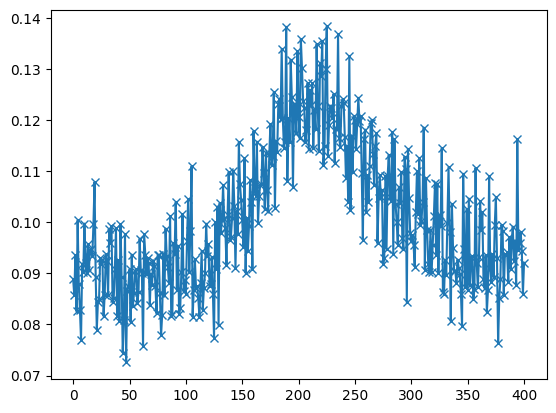

In [21]:
plt.plot(lp, marker="x")

In [22]:
# create 200-length integer array with zero at the middle (index 100)
center_zero_array = np.arange(-100, 101, dtype=int)
assert center_zero_array.size == 201 and center_zero_array[100] == 0


14:53:27 - There are nans in corr_mat
14:53:27 - There are nans in corr_mat
14:53:27 - There are nans in corr_mat
14:53:27 - There are nans in corr_mat
14:53:27 - There are nans in corr_mat
14:53:27 - There are nans in corr_mat
14:53:27 - There are nans in corr_mat
14:53:27 - There are nans in corr_mat
14:53:27 - There are nans in corr_mat
14:53:27 - There are nans in corr_mat
14:53:27 - There are nans in corr_mat
14:53:27 - There are nans in corr_mat


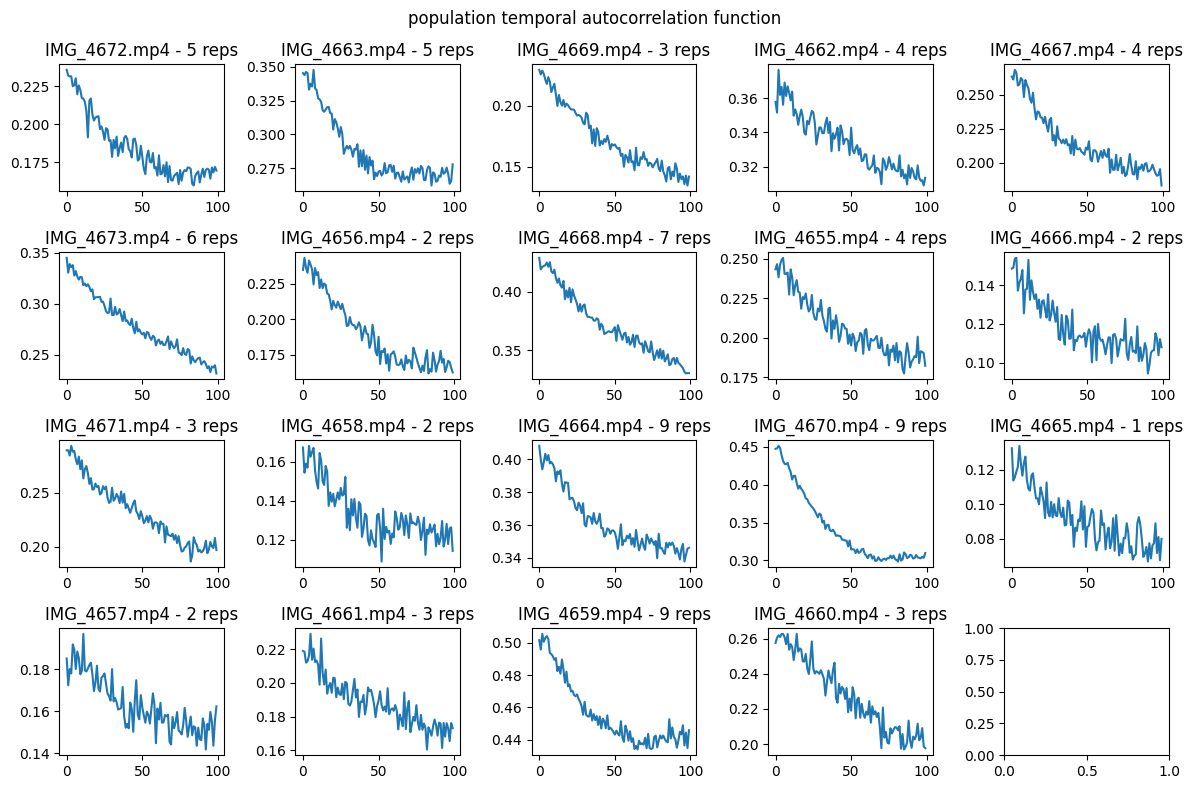

In [23]:
counter = 0
n_plots = len(stimuli_names)
n_cols = int(np.ceil(np.sqrt(n_plots)))
n_rows = int(np.ceil(n_plots / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes_flat = axes.ravel()
for i,s in enumerate(stimuli_names):
    if data[s].shape != (0,):
        n_repetitions = data[s].shape[2]
        avg_reps = np.mean(data[s], axis=2)
        first_vs_last_mat = autocorr_mat(avg_reps)
        lp_1st_vs_last = get_lagplot(first_vs_last_mat, max_lag=100, min_datapts=100, symmetric=True)
        #axes_flat[i].plot(idx_max, lp_1st_vs_last[idx_max], 'ro', markersize=4)
        axes_flat[i].plot(lp_1st_vs_last[1:])
        axes_flat[i].set_title(f"{s} - {n_repetitions} reps")
        counter += 1
plt.suptitle("population temporal autocorrelation function")
plt.tight_layout()  # automatically adjusts spacing
plt.show()

14:53:28 - There are nans in corr_mat
IMG_4672.mp4 96 0.08798510772207452
14:53:28 - There are nans in corr_mat
IMG_4663.mp4 100 0.11591833416540083
14:53:28 - There are nans in corr_mat
IMG_4669.mp4 98 0.1284592917803156
14:53:28 - There are nans in corr_mat
IMG_4662.mp4 137 0.12090110969689953
14:53:28 - There are nans in corr_mat
IMG_4667.mp4 96 0.10799255430924559
14:53:28 - There are nans in corr_mat
IMG_4673.mp4 99 0.11950087848749476
14:53:28 - There are nans in corr_mat
IMG_4656.mp4 98 0.15254273250472036
14:53:28 - There are nans in corr_mat
IMG_4668.mp4 91 0.13074240107917975
14:53:28 - There are nans in corr_mat
IMG_4655.mp4 95 0.10858681743128534
14:53:28 - There are nans in corr_mat
IMG_4666.mp4 102 0.0914349229351521
14:53:28 - There are nans in corr_mat
IMG_4671.mp4 100 0.14517676166257837
14:53:28 - There are nans in corr_mat
IMG_4658.mp4 106 0.09809164360682801
14:53:28 - There are nans in corr_mat
IMG_4664.mp4 59 0.10715392224913685
14:53:28 - There are nans in corr_m

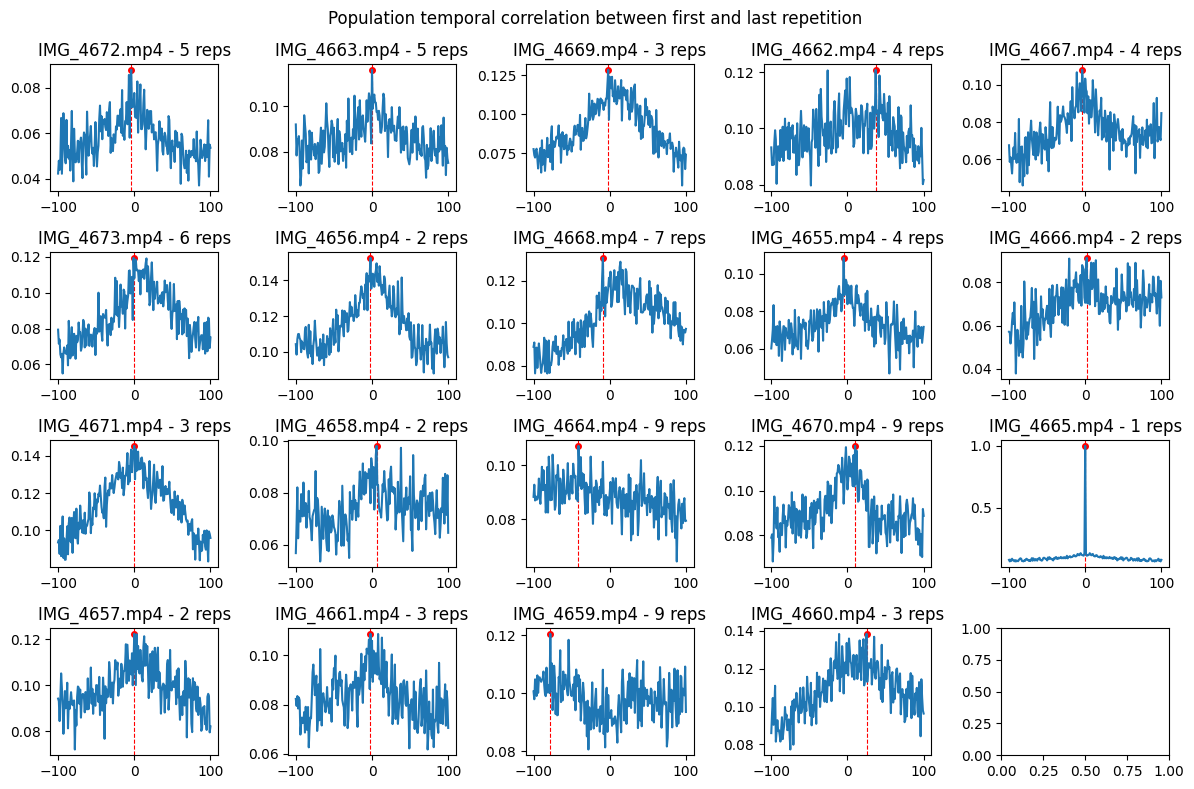

In [24]:
counter = 0
max_lag = 100
center_zero_array = np.arange(-max_lag, max_lag+1)
n_plots = len(stimuli_names)
n_cols = int(np.ceil(np.sqrt(n_plots)))
n_rows = int(np.ceil(n_plots / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes_flat = axes.ravel()
for i,s in enumerate(stimuli_names):
    if data[s].shape != (0,):
        n_repetitions = data[s].shape[2]
        first_vs_last_mat = autocorr_mat(data[s][:,:,0], data2=data[s][:,:,-1])
        lp_1st_vs_last = get_lagplot(first_vs_last_mat, max_lag=100, min_datapts=100)
        idx_max = int(np.nanargmax(lp_1st_vs_last))
        print(s, idx_max, lp_1st_vs_last[idx_max])
        axes_flat[i].axvline(center_zero_array[idx_max], color='r', linestyle='--', linewidth=0.8)
        axes_flat[i].plot(center_zero_array[idx_max], lp_1st_vs_last[idx_max], 'ro', markersize=4)
        axes_flat[i].plot(center_zero_array,lp_1st_vs_last)
        axes_flat[i].set_title(f"{s} - {n_repetitions} reps")
        counter += 1
plt.suptitle("Population temporal correlation between first and last repetition")
plt.tight_layout()  # automatically adjusts spacing
plt.show()

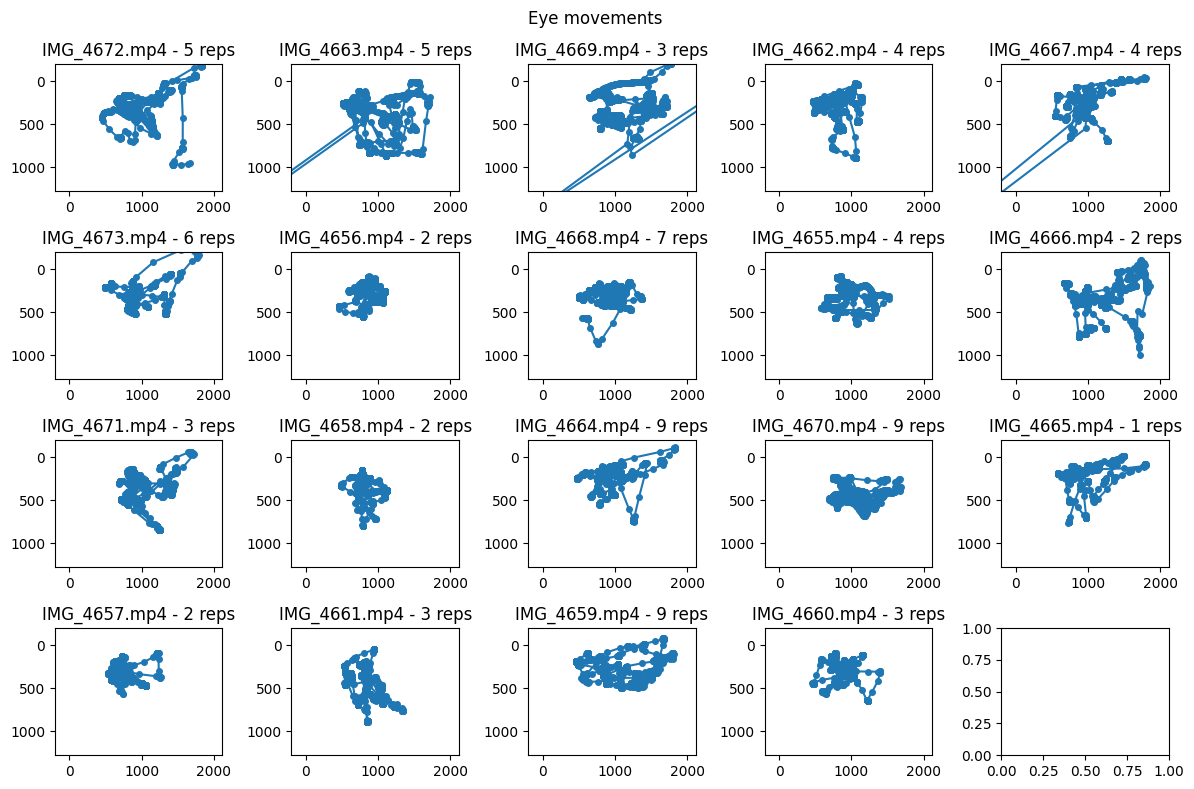

In [25]:
counter = 0
max_lag = 100
center_zero_array = np.arange(-max_lag, max_lag+1)
n_plots = len(stimuli_names)
n_cols = int(np.ceil(np.sqrt(n_plots)))
n_rows = int(np.ceil(n_plots / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes_flat = axes.ravel()
for i,s in enumerate(stimuli_names):
    if data[s].shape != (0,):
        n_repetitions = data[s].shape[2]
        axes_flat[i].plot(data_gaze[s][0,:,0], data_gaze[s][1,:,0], marker="o", markersize=4)
        axes_flat[i].set_xlim(-200, 2120)
        axes_flat[i].set_ylim(-200, 1280)
        axes_flat[i].invert_yaxis()
        axes_flat[i].set_title(f"{s} - {n_repetitions} reps")
        counter += 1
plt.suptitle("Eye movements")
plt.tight_layout()  # automatically adjusts spacing
plt.show()


In [26]:
data.keys()

dict_keys(['IMG_4672.mp4', 'IMG_4663.mp4', 'IMG_4669.mp4', 'IMG_4662.mp4', 'IMG_4667.mp4', 'IMG_4673.mp4', 'IMG_4656.mp4', 'IMG_4668.mp4', 'IMG_4655.mp4', 'IMG_4666.mp4', 'IMG_4671.mp4', 'IMG_4658.mp4', 'IMG_4664.mp4', 'IMG_4670.mp4', 'IMG_4665.mp4', 'IMG_4657.mp4', 'IMG_4661.mp4', 'IMG_4659.mp4', 'IMG_4660.mp4'])

In [27]:
stim_idx = 2
video = read_video(paths, 1, stimuli_names[stim_idx])

14:53:35 - rank 1 IMG_4669.mp4 read successfully


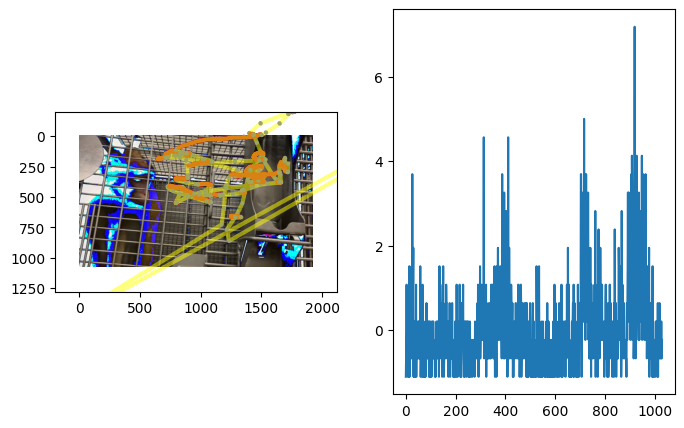

In [28]:
eyes = data_gaze[stimuli_names[stim_idx]][:,:,0]
neural = zscore(np.mean(data[stimuli_names[stim_idx]][:,:,0], axis=0))
foreperiod_len = round(300 / (1000/resolution_Hz))
for i in range(0, foreperiod_len):
    fig, ax = plt.subplots(1, 2, figsize=(8, 5))  # create a figure and axes
    ax[0].plot(eyes[0, :i], eyes[1, :i], color='yellow', linewidth=3, alpha=0.5)
    sc = ax[0].scatter(
        eyes[0, :i], eyes[1, :i],
        c=eyes[2, :i], cmap='coolwarm', s=10, edgecolors='none'
    )
    ax[0].set_xlim(-200, 2120)
    ax[0].set_ylim(-200, 1280)
    ax[0].invert_yaxis()
    ax[1].plot(neural[:i])
    plt.pause(0.01)
    plt.close(fig)  # now this works
    clear_output(wait=True)

for i in range(foreperiod_len, eyes.shape[1]):
    fig, ax = plt.subplots(1, 2, figsize=(8, 5))  # create a figure and axes
    ax[0].plot(eyes[0, :i], eyes[1, :i], color='yellow', linewidth=3, alpha=0.5)
    sc = ax[0].scatter(
        eyes[0, :i], eyes[1, :i],
        c=eyes[2, :i], cmap='coolwarm', s=10, edgecolors='none'
    )
    ax[0].set_xlim(-200, 2120)
    ax[0].set_ylim(-200, 1280)
    ax[0].invert_yaxis()
    ax[1].plot(neural[:i])
    ax[0].imshow(video[int(i//3.3)]-foreperiod_len)
    plt.pause(0.001)
    plt.close(fig)  # now this works
    clear_output(wait=True)